In [22]:
import eniric
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib notebook

In [30]:
hdu = fits.open('car-20160325T05h28m38s-sci-gtoc-nir_A_input_TAC.fits')
data_tell = hdu[1].data
wave = data_tell['WAVE']
flux_in = data_tell['SPEC']
flux_corr = data_tell['tacflux']
trans = data_tell['mtrans']
hdu[1].data

FITS_rec([( 9603.57189376, 0.        ,        nan, 1., 0.96443522, 0.        , 1.03687628, 0),
          ( 9603.62526357, 0.        ,        nan, 1., 0.94997362, 0.        , 1.05266081, 0),
          ( 9603.67862802, 0.45232666, 0.00488878, 1., 0.91125882, 0.49637562, 1.09738307, 1),
          ...,
          (17118.34389531, 0.75255471, 0.00470383, 1., 0.99919629, 0.75316004, 1.00080436, 1),
          (17118.39832382, 0.68448812, 0.00440724, 1., 0.99918708, 0.68504501, 1.00081358, 1),
          (17118.45274135, 0.62118304, 0.00378498, 1., 0.99917194, 0.62169784, 1.00082874, 1)],
         dtype=(numpy.record, [('WAVE', '>f8'), ('SPEC', '>f8'), ('CONT', '>f8'), ('SIG', '>f8'), ('mtrans', '>f8'), ('tacflux', '>f8'), ('tacdflux', '>f8'), ('tacqual', '>i4')]))

<IPython.core.display.Javascript object>


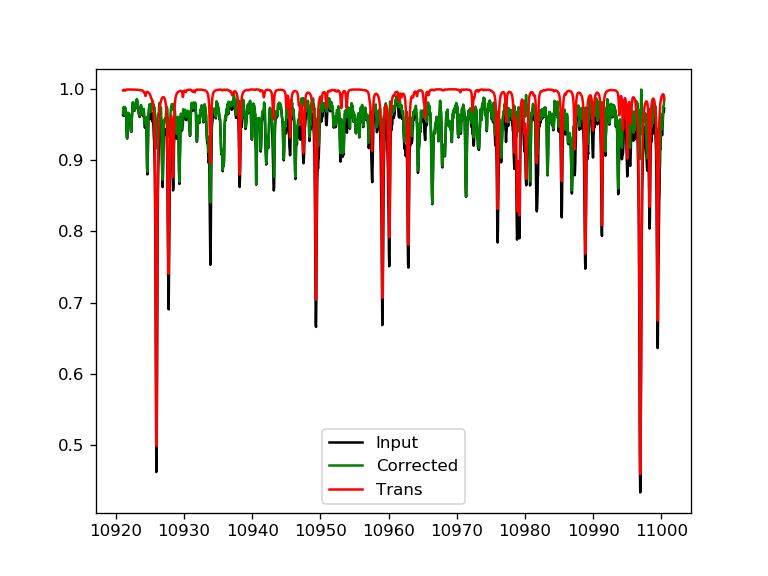

In [41]:
J_band = (wave > 10920) & (wave < 11004)
plt.plot(wave[J_band], flux_in[J_band], 'k-', label='Input')
plt.plot(wave[J_band], flux_corr[J_band], 'g-', label='Corrected')
plt.plot(wave[J_band], data_tell['mtrans'][J_band], 'r-', label='Trans')
plt.legend()
# plt.plot(wave[J_band], trans[J_band], 'b--')
#plt.plot(wave, flux_corr, 'g-', label='Corrected')

In [39]:
from eniric.Qcalculator import rv_precision
mask = J_band
rv_bf = rv_precision(wave[mask], flux_in[mask])
rv_af = rv_precision(wave[mask], flux_corr[mask])
rv_mask = rv_precision(wave[mask], flux_corr[mask], mask=trans[mask]**2)
print('RV precision: ', rv_bf, '\nafter masking/perfect tell? :', rv_mask, '\nafter telluric correction :', rv_af)

RV precision:  1521.6913777507993 m / s 
after masking/perfect tell : 3306.7702770886262 m / s 
after telluric correction : 3188.871903031692 m / s


In [24]:
from eniric.Qcalculator import quality
q = quality(wave[mask], flux_in[mask])
q_af = quality(wave[mask], flux_corr[mask])
print(q, q_af)

3155.859599001341 2944.9819666475605


In [27]:
from eniric.atmosphere import Atmosphere
# Assuming K is the correct band, and you want to mask seasonal variation.
#atm = Atmosphere.from_band("K", bary=True)

# Obtain closet telluric model values at the wavelength values (telluric mask is super sampled).
#atm = atm.at(wave[mask])

In [ ]:
atm